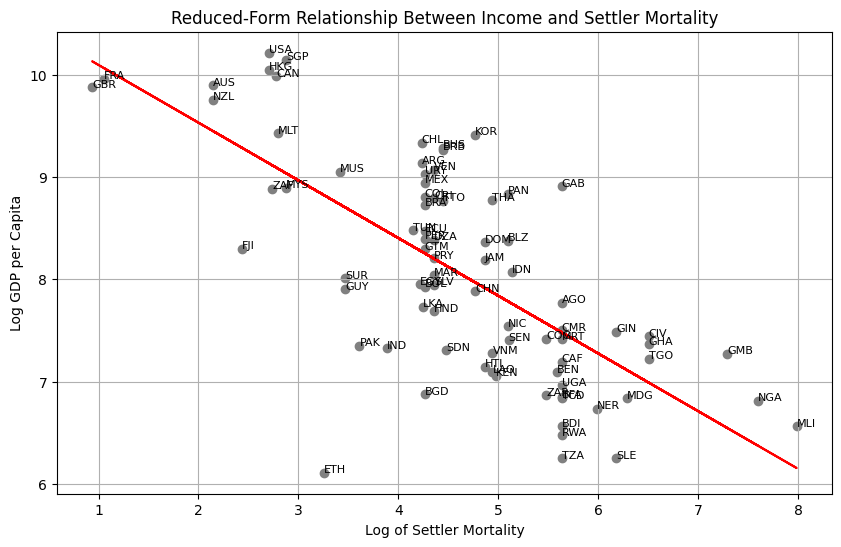

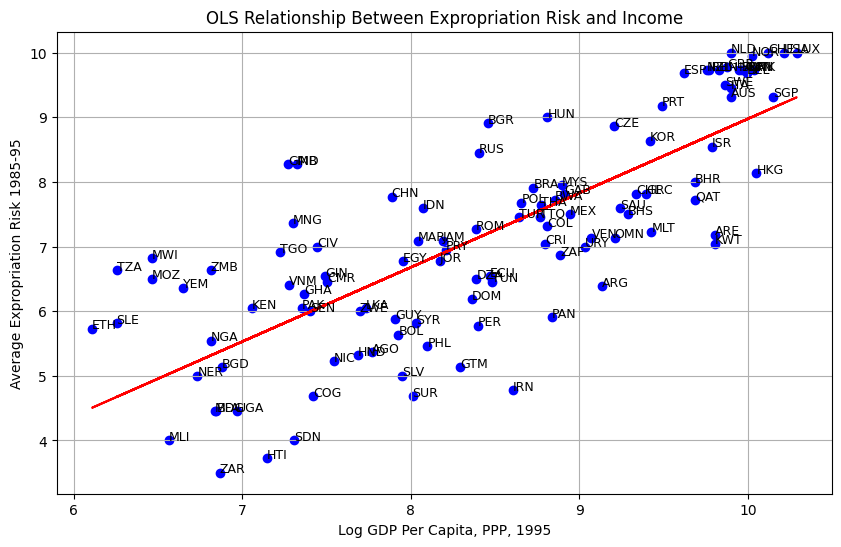

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_stata('maketable4.dta')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the .dta file has been loaded into a DataFrame named 'df'
# Update these variable names based on the actual column names in your dataset
log_settler_mortality = 'logem4'  # Placeholder for actual column name for log of settler mortality
log_gdp_per_capita = 'logpgp95'   # Placeholder for actual column name for log GDP per capita

# Load the dataset (Adjust the path as necessary)
df = pd.read_stata('maketable4.dta')

# Filter out rows with NaN or infinite values in the relevant columns
df_filtered = df.dropna(subset=[log_settler_mortality, log_gdp_per_capita])
df_filtered = df_filtered[np.isfinite(df_filtered[log_settler_mortality]) & np.isfinite(df_filtered[log_gdp_per_capita])]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered[log_settler_mortality], df_filtered[log_gdp_per_capita], color='grey')

# Labeling each point with 'shortnam'
for index, row in df_filtered.iterrows():
    plt.text(row[log_settler_mortality], row[log_gdp_per_capita], row['shortnam'], fontsize=8)

# Adding a regression line to the plot
# First, fit a linear model on the filtered data
m, b = np.polyfit(df_filtered[log_settler_mortality], df_filtered[log_gdp_per_capita], 1)

# Then, add the line to the plot
plt.plot(df_filtered[log_settler_mortality], m*df_filtered[log_settler_mortality] + b, color='red')

plt.title('Reduced-Form Relationship Between Income and Settler Mortality')
plt.xlabel('Log of Settler Mortality')
plt.ylabel('Log GDP per Capita')
plt.grid(True)
plt.show()

# Assuming 'avexpr' is Average Expropriation Risk 1985-95 and 'logpgp95' is Log GDP Per Capita, PPP, 1995
avg_expropriation_risk = 'avexpr'
log_gdp_per_capita = 'logpgp95'

# Filter out rows with NaN or infinite values in the relevant columns
df_filtered = df.dropna(subset=[avg_expropriation_risk, log_gdp_per_capita])
df_filtered = df_filtered[np.isfinite(df_filtered[avg_expropriation_risk]) & np.isfinite(df_filtered[log_gdp_per_capita])]

# Plotting the scatter plot and labeling points
plt.figure(figsize=(10, 6))
for _, row in df_filtered.iterrows():
    plt.scatter(row[log_gdp_per_capita], row[avg_expropriation_risk], color='grey')
    plt.text(row[log_gdp_per_capita], row[avg_expropriation_risk], row['shortnam'], fontsize=9)

# Adding a regression line to the plot
m, b = np.polyfit(df_filtered[log_gdp_per_capita], df_filtered[avg_expropriation_risk], 1)
plt.plot(df_filtered[log_gdp_per_capita], m*df_filtered[log_gdp_per_capita] + b, color='red')

plt.title('OLS Relationship Between Expropriation Risk and Income')
plt.xlabel('Log GDP Per Capita, PPP, 1995')
plt.ylabel('Average Expropriation Risk 1985-95')
plt.grid(True)
plt.show()


In [35]:
import pandas as pd

# Load the dataset

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming df is your DataFrame loaded from a .dta or any relevant file
df = pd.read_stata('maketable1.dta')

# Summarize key variables
summary_variables = ['logpgp95', 'loghjypl', 'avexpr', 'cons00a', 'cons1', 'democ00a', 'euro1900', 'logem4']
for var in summary_variables:
    print(f"Summary for {var}:")
    print(df[var].describe(), '\n')

# For column 2 (base sample), filter by 'baseco' and summarize again
df_base = df[df['baseco'] == 1]
for var in summary_variables:
    print(f"Base sample summary for {var}:")
    print(df_base[var].describe(), '\n')

# Generating quartiles for extmort4 and summarizing by quartiles
df['q'] = pd.qcut(df['extmort4'], 4, labels=[1, 2, 3, 4])

# Summary statistics by quartiles for specified variables
for var in summary_variables:
    print(f"Summary by quartiles for {var}:")
    print(df.groupby('q')[var].describe(), '\n')






Summary for logpgp95:
count    162.000000
mean       8.304196
std        1.070869
min        6.109248
25%        7.405482
50%        8.297785
75%        9.127172
max       10.288750
Name: logpgp95, dtype: float64 

Summary for loghjypl:
count    127.000000
mean      -1.709099
std        1.076916
min       -3.540459
25%       -2.718215
50%       -1.551169
75%       -0.817609
max        0.000000
Name: loghjypl, dtype: float64 

Summary for avexpr:
count    129.000000
mean       6.988548
std        1.831779
min        1.636364
25%        5.818182
50%        7.000000
75%        8.272727
max       10.000000
Name: avexpr, dtype: float64 

Summary for cons00a:
count    96.000000
mean      1.854167
std       1.788732
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       7.000000
Name: cons00a, dtype: float64 

Summary for cons1:
count    92.000000
mean      3.630435
std       2.393753
min       1.000000
25%       1.000000
50%       3.000000
75%       7.000000
ma

In [36]:
# Path to the .do file
do_file_path = 'maketable2.do'

# Open and read the .do file
try:
    with open(do_file_path, 'r') as file:
        do_file_contents = file.read()
        print(do_file_contents)
except FileNotFoundError:
    print(f"The file at {do_file_path} was not found.")


***********************************************************
*Creates Table 2: OLS Regressions
***********************************************************
clear
capture log close
cd G:\daron\colonial_origins
log using maketable2, replace

/*Data Files Used
	maketable2.dta
	
*Data Files Created as Final Product
	none
	
*Data Files Created as Intermediate Product
	none*/
	
***********************
*---Column 1
***********************

*Note: there are 111 countries in the world sample that have all the necessary data to run the below regressions, though the paper only reports 110 observations. I'm not sure which of the 111 observations is not used in the paper, so the regressions below will use all 111 obs. and won't quite match the results reported in the paper. 

use maketable2, clear

regress logpgp95 avexpr, robust


***********************
*---Column 2
***********************

regress logpgp95 avexpr if baseco==1, robust


***********************
*--Column 3
***********************

r

In [37]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
df = pd.read_stata('maketable2.dta')

# Define a function to perform OLS regression and print the summary
def ols_regression(data, formula):
    model = smf.ols(formula, data=data).fit(cov_type='HC1')  # HC1 for robust standard errors
    return model.summary()

# Column 1
print(ols_regression(df, 'logpgp95 ~ avexpr'))

# Column 2
print(ols_regression(df[df['baseco'] == 1], 'logpgp95 ~ avexpr'))

# Column 3
print(ols_regression(df, 'logpgp95 ~ avexpr + lat_abst'))

# Column 4
print(ols_regression(df, 'logpgp95 ~ avexpr + lat_abst + africa + asia + other'))

# Column 5
print(ols_regression(df[df['baseco'] == 1], 'logpgp95 ~ avexpr + lat_abst'))

# Column 6
print(ols_regression(df[df['baseco'] == 1], 'logpgp95 ~ avexpr + lat_abst + africa + asia + other'))

# Column 7
print(ols_regression(df, 'loghjypl ~ avexpr'))

# Column 8
print(ols_regression(df[df['baseco'] == 1], 'loghjypl ~ avexpr'))


                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     334.8
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           5.14e-35
Time:                        16:58:07   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6261      0.241     19.222      0.0

In [48]:

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming df is your DataFrame loaded from 'maketable3.dta'
# Filter the DataFrame
df_filtered = df[(df['excolony'] == 1) & (df['extmort4'].notna())]
df_filtered['euro1900'] = df_filtered['euro1900'] / 100

# Define a function to run regressions and print results
def run_regression(formula):
    model = smf.ols(formula, data=df_filtered).fit(cov_type='HC1')  # Using robust standard errors
    return model.summary()

# Panel A: Dependent Variable Is Average Protection Against Expropriation Risk in 1985-1995
formulas = [
    "avexpr ~ cons00a",
    "avexpr ~ lat_abst + cons00a",
    "avexpr ~ democ00a",
    "avexpr ~ democ00a + lat_abst",
    "avexpr ~ indtime + cons1",
    "avexpr ~ indtime + cons1 + lat_abst",
    "avexpr ~ euro1900",
    "avexpr ~ euro1900 + lat_abst",
    "avexpr ~ logem4",
    "avexpr ~ logem4 + lat_abst"
]

# Run and print each regression from Panel A
for i, formula in enumerate(formulas, 1):
    print(f"Column {i} regression results:")
    print(run_regression(formula))
    print("\n---\n")

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
df = pd.read_stata('maketable3.dta')  # Adjust path as necessary

# Filter the dataset
df = df[(df['excolony'] == 1) & df['extmort4'].notna() & df['logpgp95'].notna()]

# Normalize euro1900 by dividing by 100
df['euro1900'] = df['euro1900'] / 100

# Define the regression models for Panel B
models = {
    'col 1': 'cons00a ~ euro1900',
    'col 2': 'cons00a ~ euro1900 + lat_abst',
    'col 3': 'cons00a ~ logem4',
    'col 4': 'cons00a ~ lat_abst + logem4',
    'col 5': 'democ00a ~ euro1900',
    'col 6': 'democ00a ~ lat_abst + euro1900',
    'col 7': 'democ00a ~ logem4',
    'col 8': 'democ00a ~ lat_abst + logem4',
    'col 9': 'euro1900 ~ logem4',
    'col 10': 'euro1900 ~ lat_abst + logem4'
}

results = []

# Run the regressions and collect results
for col, formula in models.items():
    result = smf.ols(formula, data=df).fit(cov_type='HC1')  # HC1 for robust standard errors
    summary = {
        'Model': col,
        'R-squared': result.rsquared,
        'Coefficients': result.params,
        'P-values': result.pvalues,
        'Observations': int(result.nobs)
        # Include other metrics as needed
    }
    results.append(summary)

# Print the results in a row-column format
for res in results:
    print(f"Model: {res['Model']}")
    print(f"R-squared: {res['R-squared']}")
    print("Coefficients:")
    print(res['Coefficients'])
    print("P-values:")
    print(res['P-values'])
    print(f"Observations: {res['Observations']}")
    print('-------------------------\n')



***********************************************************
*Creates Table 3: Determinants of Institutions
***********************************************************
clear
capture log close
cd G:\daron\colonial_origins
log using maketable3, replace

/*Data Files Used
	colonial_origins.dta
	
*Data Files Created as Final Product
	none
	
*Data Files Created as Intermediate Product
	none*/
	

use maketable3, clear
keep if excolony==1
keep if extmort4!=.
replace euro1900=euro1900 / 100

*******************
*--Panel A
*******************

*--Dependent Variable Is Average Protection Against Exproptiation Risk in 1985-1995

*col 1
reg  avexpr cons00a if excolony==1 & extmort4~=.
*col 2
reg  avexpr lat_abst cons00a if excolony==1 & extmort4~=.
*col 3
reg  avexpr democ00a if excolony==1 & extmort4~=.
*col 4
reg  avexpr democ00a lat_abst if excolony==1 & extmort4~=.
*col 5
reg  avexpr indtime cons1 if excolony==1 & extmort4~=.
*col 6
reg  avexpr indtime cons1 lat_abst if excolony==1 & extmort4~=

In [60]:

!pip install pandas linearmodels statsmodels

import pandas as pd
import numpy as np
from linearmodels.iv import IV2SLS
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
df = pd.read_stata('maketable4.dta')
df = df[df['baseco'] == 1]  # Keep if baseco == 1

# Generating 'other_cont' based on 'shortnam'
df['other_cont'] = 0
df.loc[df['shortnam'].isin(['AUS', 'MLT', 'NZL']), 'other_cont'] = 1

# Panels A and B: IV Regressions
# Define conditions for filtering
conditions = {
    'Base Sample': df,
    'Base Sample w/o Neo-Europes': df[df['rich4'] != 1],
    'Base Sample w/o Africa': df[df['africa'] != 1],
    'Base Sample with continent dummies': df  # Already prepared df includes 'other_cont'
}

# Instrumental Variable Regressions
iv_models = [
    ('logpgp95 ~ 1 + [avexpr ~ logem4]', 'Base Sample'),
    ('logpgp95 ~ 1 + lat_abst + [avexpr ~ logem4]', 'Base Sample'),
    ('logpgp95 ~ 1 + [avexpr ~ logem4]', 'Base Sample w/o Neo-Europes'),
    ('logpgp95 ~ 1 + lat_abst + [avexpr ~ logem4]', 'Base Sample w/o Neo-Europes'),
    ('logpgp95 ~ 1 + [avexpr ~ logem4]', 'Base Sample w/o Africa'),
    ('logpgp95 ~ 1 + lat_abst + [avexpr ~ logem4]', 'Base Sample w/o Africa'),
    ('logpgp95 ~ 1 + africa + asia + other_cont + [avexpr ~ logem4]', 'Base Sample with continent dummies'),
    ('logpgp95 ~ 1 + lat_abst + africa + asia + other_cont + [avexpr ~ logem4]', 'Base Sample with continent dummies'),
    ('loghjypl ~ 1 + [avexpr ~ logem4]', 'Base Sample'),
]

# Fill NaN values with the mean of the column
df['loghjypl'] = df['loghjypl'].fillna(df['loghjypl'].mean())

for formula, condition in iv_models:
    df_cond = conditions[condition]
    iv_model = IV2SLS.from_formula(formula, df_cond).fit(cov_type='robust')
    print(f"IV Regression Results for {condition}:")
    print(iv_model.summary)
    print("\n-----------------------\n")

# Panel C: OLS Regressions
# OLS regressions follow a similar pattern without the need for instrument specification
ols_formulas = [
    'logpgp95 ~ avexpr',
    'logpgp95 ~ lat_abst + avexpr',
    # Add more formulas as needed for each condition and column
]

for formula in ols_formulas:
    ols_model = smf.ols(formula, data=df).fit()
    print(f"OLS Regression Results:")
    print(ols_model.summary())
    print("\n-----------------------\n")


***********************************************************
*Creates Table 4: IV Regressions of Log GDP per Capita
***********************************************************
clear
capture log close
cd G:\daron\colonial_origins
log using maketable4, replace

/*Data Files Used
	maketable4.dta
	
*Data Files Created as Final Product
	none
	
*Data Files Created as Intermediate Product
	none*/
	

use maketable4, clear
keep if baseco==1

**********************************
*--Panels A and B, IV Regressions
**********************************
*Columns 1 - 2 (Base Sample)

ivreg logpgp95 (avexpr=logem4), first
ivreg logpgp95 lat_abst (avexpr=logem4), first


*Columns 3 - 4 (Base Sample w/o Neo-Europes)

ivreg logpgp95 (avexpr=logem4) if rich4!=1, first
ivreg logpgp95 lat_abst (avexpr=logem4) if rich4!=1, first


*Columns 5 - 6 (Base Sample w/o Africa)

ivreg logpgp95 (avexpr=logem4) if africa!=1, first
ivreg logpgp95 lat_abst (avexpr=logem4) if africa!=1, first


*Columns 7 - 8 (Base Sample with

In [102]:


!pip install pandas statsmodels

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS

# Load the dataset (update the path as necessary)
df = pd.read_stata('maketable5.dta')

# Keep if baseco == 1
df = df[df['baseco'] == 1]

# Define a function to run IV regressions
def run_iv_regression(dependent, exog, endog, instruments, condition=None):
    if condition is not None:
        df_filtered = df.query(condition)
    else:
        df_filtered = df
    iv = IV2SLS(dependent=df_filtered[dependent],
                exog=sm.add_constant(df_filtered[exog]),
                endog=df_filtered[endog],
                instruments=df_filtered[instruments]).fit()
    return iv

# Define a function to run OLS regressions
def run_ols_regression(formula, data=df):
    ols = smf.ols(formula, data=data).fit()
    return ols

# Panels A and B, IV Regressions
# Columns 1 and 2 (British and French colony dummies)
print(run_iv_regression(dependent='logpgp95', exog=['f_brit', 'f_french'], endog='avexpr', instruments='logem4').summary)
print(run_iv_regression(dependent='logpgp95', exog=['lat_abst', 'f_brit', 'f_french'], endog='avexpr', instruments='logem4').summary)

# Add other IV regressions as needed following the pattern above

# Panel C, OLS Regressions
# Columns 1 and 2 (British and French colony dummies)
print(run_ols_regression(formula='logpgp95 ~ avexpr + f_brit + f_french').summary())
print(run_ols_regression(formula='logpgp95 ~ lat_abst + avexpr + f_brit + f_french').summary())

# Add other OLS regressions as needed following the pattern above



In [109]:
do_file_path = 'maketable6.do'  # Replace with your .do file path

with open(do_file_path, 'r') as file:
    do_file_contents = file.read()

print(do_file_contents)


import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS

# Load your dataset (replace 'maketable6.dta' with the actual file path)
df = pd.read_stata('maketable6.dta')

# Keep only observations where 'baseco' is 1
df = df[df['baseco'] == 1]

def run_ols(formula, data):
    model = smf.ols(formula, data=data).fit()
    print(model.summary())

def run_iv(dependent, exog, endog, instruments, data):
    exog_vars = sm.add_constant(data[exog]) if exog else sm.add_constant(pd.DataFrame(index=data.index))
    iv_model = IV2SLS(dependent=data[dependent], exog=exog_vars, endog=data[endog], instruments=data[instruments]).fit()
    print(iv_model.summary)
# Example for Columns 1 and 2 (adjust 'temp*' and 'humid*' placeholders)
temp_humid_vars = ['temp1', 'temp2', 'humid1', 'humid2']  # Update with actual column names
run_iv(dependent='logpgp95', exog=[], endog=['avexpr'], instruments=temp_humid_vars, data=df)

# Repeat for other specifications, adjusting endog, exog, and instruments as per your model
# Example for Columns 1 and 2 (adjust 'temp*' and 'humid*' placeholders)
run_ols('logpgp95 ~ avexpr + temp1 + temp2 + humid1 + humid2', df)  # Update with actual column names

# Repeat for other specifications as per your model







**********************************************************************************
*Creates Table 6: Robustness Checks for IV Regressions with Log GDP Per Capita
**********************************************************************************
clear
capture log close
cd G:\daron\colonial_origins
log using maketable6, replace

/*Data Files Used
	maketable6.dta
	
*Data Files Created as Final Product
	none
	
*Data Files Created as Intermediate Product
	none*/
	
use maketable6, clear
keep if baseco==1


**********************************
*--Panels A and B, IV Regressions
**********************************

*--Columns 1 and 2 (Temperature and humidity controls)

ivreg logpgp95 (avexpr=logem4) temp* humid*, first
ivreg logpgp95 lat_abst (avexpr=logem4) temp* humid*, first

*--Columns 3 and 4 (Control for percent of European descent in 1975)

ivreg logpgp95 (avexpr=logem4) edes1975, first
ivreg logpgp95 lat_abst (avexpr=logem4) edes1975, first

*--Columns 5 and 6 (Controls for soil quality, 

In [106]:

df = pd.read_stata('maketable7.dta')

from linearmodels.iv import IV2SLS
import pandas as pd
import statsmodels.api as sm

# Assuming 'df' is your DataFrame and it has been filtered for 'baseco' == 1

# Define helper function for IV regression with correct instrument-endogenous variable pairing
def run_iv_corrected(dependent, exog, endog, instrument, data):
    exog_vars = sm.add_constant(data[exog]) if exog else sm.add_constant(pd.DataFrame(index=data.index))
    iv_model = IV2SLS(data[dependent], exog_vars, data[endog], data[instrument]).fit(cov_type='unadjusted')
    print(iv_model.summary)

# Example adjustment for one of the IV regression calls
# Assuming 'avexpr' is endogenous and 'malfal94' is its instrument
run_iv_corrected(dependent='logpgp95', exog=[], endog=['avexpr'], instrument=['malfal94'], data=df)

# Adjust other IV regression calls similarly, ensuring there's a matching number of instruments for endogenous variables.


**********************************************************************************
*Creates Table 7: Geography and Health Variables
**********************************************************************************
clear
capture log close
cd G:\daron\colonial_origins
log using maketable7, replace

/*Data Files Used
	maketable7
	
*Data Files Created as Final Product
	none
	
*Data Files Created as Intermediate Product
	none*/
	
use maketable7, clear
keep if baseco==1


**********************************
*--Panels A and B, IV Regressions
**********************************

*Columns 1 and 2: Instrumenting only for average protection against expropriaton risk: malaria control

ivreg logpgp95 (avexpr=logem4) malfal94, first
ivreg logpgp95 lat_abst (avexpr=logem4) malfal94, first

*Columns 3 and 4: Instrumenting only for average protection against expropriaton risk: life expectancy control

ivreg logpgp95 (avexpr=logem4) leb95, first
ivreg logpgp95 lat_abst (avexpr=logem4) leb95, first

*Colu

/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(


In [108]:
do_file_path = 'maketable7.do'  # Replace with your .do file path

with open(do_file_path, 'r') as file:
    do_file_contents = file.read()

print(do_file_contents)

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS

# Load your dataset
df = pd.read_stata('maketable7.dta')  # Adjust the file name/path as necessary

# Keep only observations where 'baseco' is 1
df = df[df['baseco'] == 1]

# Generate 'other_cont'
df['other_cont'] = 0
df.loc[df['shortnam'].isin(['AUS', 'MLT', 'NZL']), 'other_cont'] = 1

# Helper function for OLS
def run_ols(formula, data):
    model = smf.ols(formula, data=data).fit()
    print(model.summary())

# Helper function for IV regression
def run_iv(formula, data, instrument=None):
    if instrument:
        # Separate dependent and independent variables from the formula
        dependent, independent = formula.split('~')
        dependent = dependent.strip()
        independents = independent.split('+')
        endog = independents[0].strip()  # Assuming the first independent variable is endogenous

        # Define exogenous and instrument variables
        exog_vars = [var.strip() for var in independents[1:]] if len(independents) > 1 else []
        exog = sm.add_constant(data[exog_vars])
        endog = data[[endog]]
        instr = data[[instrument]]

        model = IV2SLS(dependent=data[dependent], exog=exog, endog=endog, instruments=instr).fit(cov_type='unadjusted')
        print(model.summary)
    else:
        run_ols(formula, data)

# Panel A and B: IV Regressions
# Column 1 and 2 example
run_iv('logpgp95 ~ avexpr', data=df, instrument='malfal94')
run_iv('logpgp95 ~ avexpr + lat_abst', data=df, instrument='malfal94')

# Add similar calls for other columns as needed, adjusting the formula and instruments accordingly

# Panel C: OLS Regressions
# Columns 1 and 2 example
run_ols('logpgp95 ~ avexpr + malfal94', data=df)
run_ols('logpgp95 ~ lat_abst + avexpr + malfal94', data=df)

# Add similar calls for other columns as needed


**********************************************************************************
*Creates Table 7: Geography and Health Variables
**********************************************************************************
clear
capture log close
cd G:\daron\colonial_origins
log using maketable7, replace

/*Data Files Used
	maketable7
	
*Data Files Created as Final Product
	none
	
*Data Files Created as Intermediate Product
	none*/
	
use maketable7, clear
keep if baseco==1


**********************************
*--Panels A and B, IV Regressions
**********************************

*Columns 1 and 2: Instrumenting only for average protection against expropriaton risk: malaria control

ivreg logpgp95 (avexpr=logem4) malfal94, first
ivreg logpgp95 lat_abst (avexpr=logem4) malfal94, first

*Columns 3 and 4: Instrumenting only for average protection against expropriaton risk: life expectancy control

ivreg logpgp95 (avexpr=logem4) leb95, first
ivreg logpgp95 lat_abst (avexpr=logem4) leb95, first

*Colu

/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(
/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(
